# Task 1 - Preguntas teoricas

### Pregunta 1
- Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de
gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

El descenso de gradiente es un método para ajustar los parámetros de un modelo minimizando el error. Hay tres formas principales de usarlo:
1.  **descenso de gradiente batch**, que usa todos los datos de entrenamiento para calcular cada actualización (es preciso pero lento y costoso en grandes datasets). 

2.  **descenso de gradiente estocástico (SGD)**, que actualiza los parámetros después de cada dato individual (es rápido y tiene más variabilidad, lo que ayuda a escapar de mínimos locales, pero puede ser inestable). 

3. **descenso de gradiente por mini-batches**, que hace un balance entre los dos anteriores al actualizar con pequeños grupos de datos (es más eficiente que el batch y más estable que el estocástico, por eso es el más usado en la práctica).


### Pregunta 2
- Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature
selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.

La **extracción de features** y la **selección de features** son dos maneras de reducir la cantidad de información en un modelo, pero funcionan diferente. La extracción de features transforma los datos originales en nuevas representaciones más compactas y útiles (por ejemplo, con PCA, embeddings en NLP o convoluciones en imágenes). En cambio, la selección de features elige las características más relevantes del conjunto original, descartando las irrelevantes o redundantes (como usar métodos estadísticos o árboles de decisión).  

Por ejemplo, si trabajas con imágenes en visión por computadora, la extracción de features con CNNs es clave para detectar patrones sin procesar cada píxel. En cambio, si tienes un dataset tabular con muchas columnas y algunas no aportan información, la selección de features con métodos como *LASSO* o *feature importance* de un árbol de decisión ayuda a mejorar el rendimiento sin perder interpretabilidad.

### Pregunta 3
- Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin
backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros

Un **perceptrón de una sola capa** es una red neuronal muy simple que se usa para clasificar datos linealmente separables. Su arquitectura consiste en una capa de entrada, donde cada neurona recibe una o más características del dato de entrada, y una sola neurona de salida que produce la predicción. Cada entrada está conectada a la salida con un peso, y la salida se calcula con una combinación lineal de las entradas y una función de activación (usualmente una función escalón).  

El perceptrón aprende ajustando sus pesos mediante la **regla de aprendizaje del perceptrón**, que funciona de manera sencilla: cuando hace una predicción incorrecta, ajusta los pesos en la dirección correcta sumando o restando un pequeño valor proporcional al error y a la entrada correspondiente. No usa *backpropagation* ni puede resolver problemas no lineales, como el XOR, pero es útil para entender los fundamentos de las redes neuronales.

# Task 2 - Ejercicios Practicos

### Task 2.1 - Gradiente Descendiente Estocástico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from IPython.display import display

In [2]:

# f(x) = 2x^3 - 3x^2 + 5x + 3
polinomio = np.array([2, -3, 5, 3])

np.random.seed(42)
x_test = np.linspace(-2, 2, 100)
y_test = np.polyval(polinomio, x_test) + np.random.normal(scale=3, size=len(x_test))  # Ruido

derivada = np.polyder(polinomio)
coeficientes = np.random.randn(4)

pasos_size = 0.01
epochs = 500
batch_size = 10


In [3]:

def predict(coeffs, x):
    return np.polyval(coeffs, x)

def prom_error(actual_y, y_predict):
    return np.mean((actual_y - y_predict) ** 2)

def batch(x, y, coeffs, lr, epochs):
    coeffs = coeffs.copy()
    n = len(x)
    errors = []
    start = time.time()

    for _ in range(epochs):
        y_pred = predict(coeffs, x)
        error = prom_error(y, y_pred)
        errors.append(error)

        grad = np.polyval(derivada  , x)
        coeffs -= lr * (2/n) * np.polyval(derivada, x).dot(y_pred - y)

    elapsed_time = time.time() - start
    return coeffs, errors, elapsed_time


In [4]:

# Implementación del Descenso de Gradiente Estocástico
def gradient_descent(x, y, coeffs, lr, epochs):
    coeffs = coeffs.copy()
    errors = []
    start_time = time.time()

    for _ in range(epochs):
        idx = np.random.randint(len(x))  # Seleccionamos un punto al azar
        xi, yi = x[idx], y[idx]

        y_pred = predict(coeffs, xi)
        error = prom_error(y, predict(coeffs, x))
        errors.append(error)

        grad = np.polyval(derivada, xi)
        coeffs -= lr * 2 * grad * (y_pred - yi)

    elapsed_time = time.time() - start_time
    return coeffs, errors, elapsed_time

# Implementación del Descenso de Gradiente por Mini Batches
def minibatch(x, y, coeffs, lr, epochs, batch_size):
    coeffs = coeffs.copy()
    errors = []
    start_time = time.time()
    n = len(x)

    for _ in range(epochs):
        indices = np.random.choice(n, batch_size, replace=False)  # Seleccionamos un minibatch
        x_batch, y_batch = x[indices], y[indices]

        y_pred = predict(coeffs, x_batch)
        error = prom_error(y, predict(coeffs, x))
        errors.append(error)

        grad = np.polyval(derivada, x_batch)
        coeffs -= lr * (2 / batch_size) * np.polyval(derivada, x_batch).dot(y_pred - y_batch)

    elapsed_time = time.time() - start_time
    return coeffs, errors, elapsed_time


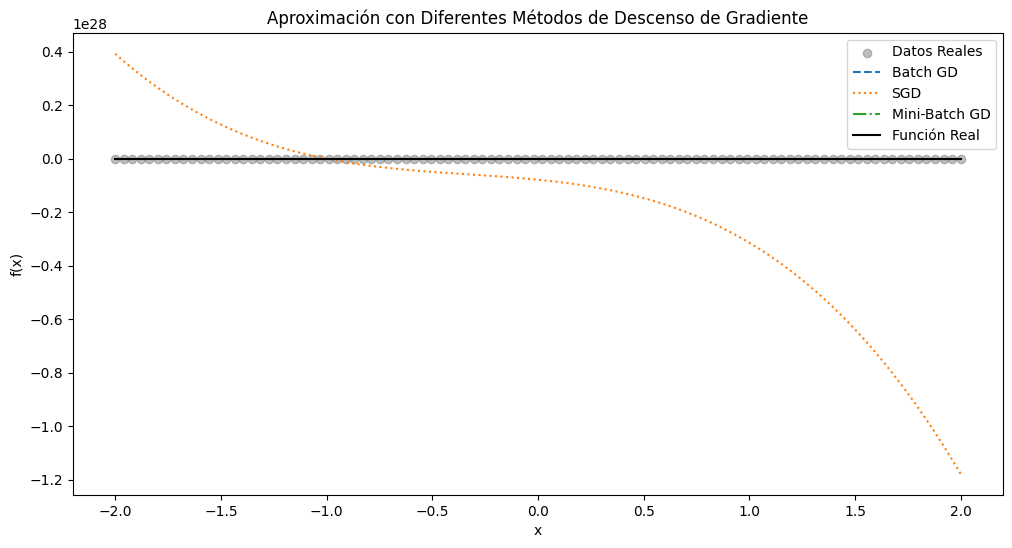

,Método,Tiempo (s),Error MSE
0,Batch GD,0.025540,5.009812e+03
1,SGD,0.020682,1.528912e+55
2,Mini-Batch GD,0.035996,1.168904e+02


In [5]:

# Ejecutamos los tres métodos
coeffs_batch, errors_batch, time_batch = batch(x_test, y_test, coeficientes, pasos_size, epochs)
coeffs_sgd, errors_sgd, time_sgd = gradient_descent(x_test, y_test, coeficientes, pasos_size, epochs)
coeffs_minibatch, errors_minibatch, time_minibatch = minibatch(x_test, y_test, coeficientes, pasos_size, epochs, batch_size)

# Calculamos los errores finales de cada método
final_mse_batch = prom_error(y_test, predict(coeffs_batch, x_test))
final_mse_sgd = prom_error(y_test, predict(coeffs_sgd, x_test))
final_mse_minibatch = prom_error(y_test, predict(coeffs_minibatch, x_test))

# Graficamos los resultados
plt.figure(figsize=(12, 6))
plt.scatter(x_test, y_test, label="Datos Reales", color="gray", alpha=0.5)

x_fit = np.linspace(-2, 2, 100)
plt.plot(x_fit, predict(coeffs_batch, x_fit), label="Batch GD", linestyle="dashed")
plt.plot(x_fit, predict(coeffs_sgd, x_fit), label="SGD", linestyle="dotted")
plt.plot(x_fit, predict(coeffs_minibatch, x_fit), label="Mini-Batch GD", linestyle="dashdot")
plt.plot(x_fit, predict(coeficientes, x_fit), label="Función Real", linestyle="solid", color="black")

plt.legend()
plt.title("Aproximación con Diferentes Métodos de Descenso de Gradiente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

# Mostramos los tiempos y errores finales
results_df = pd.DataFrame({
    "Método": ["Batch GD", "SGD", "Mini-Batch GD"],
    "Tiempo (s)": [time_batch, time_sgd, time_minibatch],
    "Error MSE": [final_mse_batch, final_mse_sgd, final_mse_minibatch]
})


# Mostrar la tabla en Jupyter Notebook
from IPython.display import display
display(results_df)



### Comparacion de los 3

En términos de precisión, el **Descenso de Gradiente por Mini-Batches** fue el mejor de los tres métodos. Su error fue mucho menor que el del Batch GD y, definitivamente, muchísimo mejor que el del SGD, que no logró converger correctamente. Esto puede ser porque Mini-Batch GD hace un buen balance entre usar suficiente información del dataset para cada actualización y mantener cierta estabilidad en los pesos mientras aprende.

En cuanto al tiempo, el **SGD** fue el más rápido, pero a costa de una precisión muy baja. El Batch GD fue un poco más lento que el SGD, pero su error seguía siendo considerablemente mayor que el del Mini-Batch GD. Aunque Mini-Batch GD tomó un poquito más de tiempo que los otros dos, la diferencia no fue muy grande y valió la pena por el gran salto en precisión que logró.